# Урок 6. Задания

### Описание данных

Предположим, что Толя любит авокадо и решил посмотреть динамику цен на данный продукт в США. Имеется следующий набор данных от Hass Avocado Board 🥑:  


- Date — дата
- AveragePrice — средняя цена одного авокадо
- Total Volume — количество проданных авокадо
- 4046 — количество проданных авокадо PLU* 4046
- 4225 — количество проданных авокадо PLU 4225
- 4770 — количество проданных авокадо PLU 4770
- Total Bags — всего упаковок
- Small Bags — маленькие упаковки
- Large Bags — большие
- XLarge Bags — очень большие
- type — обычный или органический
- year — год
- Region — город или регион the city or region of the observation

*PLU — код товара (Product Lookup code)

*В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные, где:

avocado_mean = pd.read_csv("path",
                           index_col=0, squeeze=True, parse_dates=['Date'])

                           Date
                           2015-01-04    1.301296
                           2015-01-11    1.370648
                           2015-01-18    1.391111
                           2015-01-25    1.397130
                           2015-02-01    1.247037
                           Name: AveragePrice, dtype: float64

#### Импорт библиотек

In [325]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#### Импорт данных

In [304]:
avocado_full = pd.read_csv('/Users/ola/Documents/Karpov/6. Подробнее о визуализации/avocado_full.csv', index_col = 0)

avocado_mean = pd.read_csv('/Users/ola/Documents/Karpov/6. Подробнее о визуализации/avocado_mean.csv')

#### Взглянем на датафреймы

In [305]:
avocado_full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [306]:
avocado_mean

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


#### Для удобства переименуем названия столбцов

In [307]:
# Функция для замены в строках пробелов на нижнее подчеркивание

def undescore_rename(name):
    return name.replace(' ', '_')

In [308]:
# Переименование названий столбцов фрейма avocado_full

avocado_full = avocado_full.rename(columns = undescore_rename)

In [309]:
# Взглянем на фрейм avocado_full с новыми названиями столбцов

avocado_full.head()

,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


#### Работа с пропущенными значениями

In [312]:
# Посчитаем число пропущенных значений

avocado_full.isna().sum()

AveragePrice    0
Total_Volume    0
4046            0
4225            0
4770            0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64

In [313]:
avocado_mean.isna().sum()

Date            0
AveragePrice    0
dtype: int64

Пропущенных значений нет

#### Работа с дубликатами

In [314]:
# Проверим, есть ли в датасете дубликаты

avocado_full.drop_duplicates().shape

(18249, 12)

In [315]:
avocado_mean.drop_duplicates().shape

(169, 2)

Дубликатов нет

### Задание 1
Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [105]:
round(avocado_mean.AveragePrice.rolling(3).mean().max(), 2)

1.85

### Задание 2

Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.

Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна. (task3.png)

In [252]:
# Функция для построения графика скользящего среднего с изменяемым значением параметра window

def draw_rolling_graph(df, x_label, y_label, window):
    ax = df.copy(deep = True) # независимое копирование
    ax[y_label] = df[y_label].rolling(window).mean()
    
    plt.figure(figsize=(11, 7))
    sns.lineplot(data = ax, x = x_label, y = y_label).set(title = 'window = {}'.format(window))

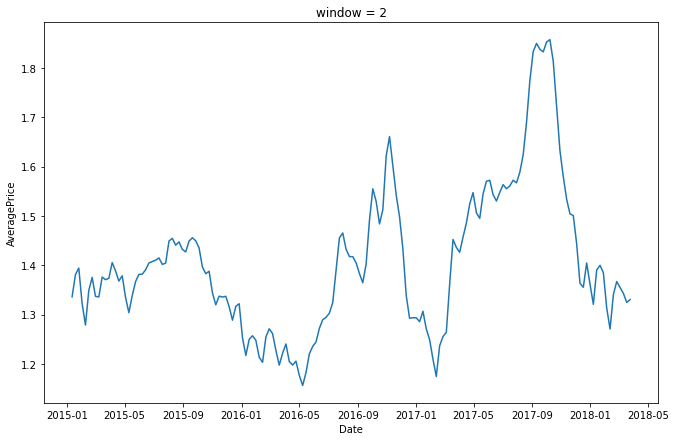

In [253]:
draw_rolling_graph(avocado_mean, 'Date', 'AveragePrice', 2)

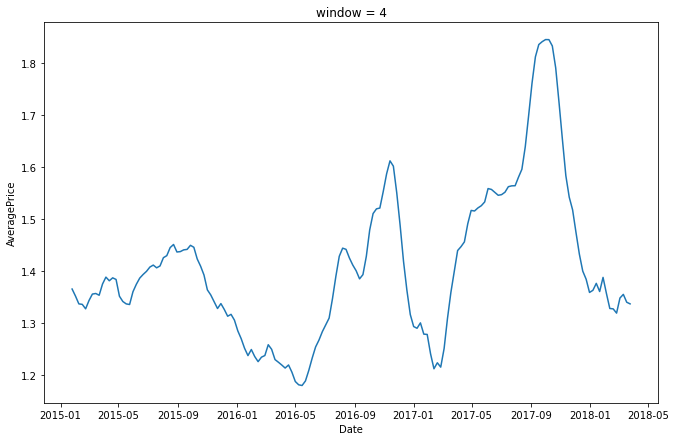

In [245]:
draw_rolling_graph(avocado_mean, 'Date', 'AveragePrice', 4)

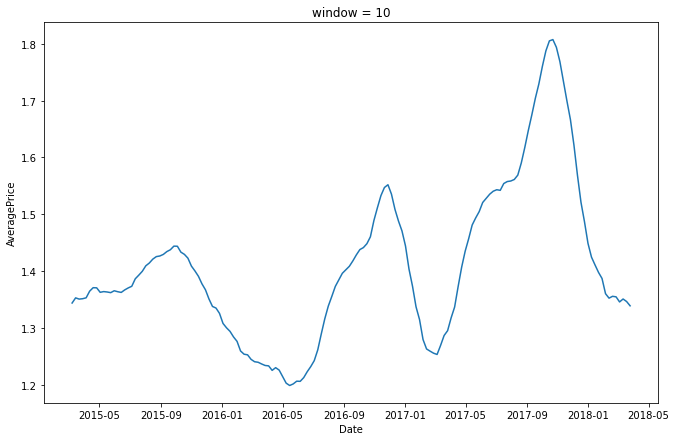

In [246]:
draw_rolling_graph(avocado_mean, 'Date', 'AveragePrice', 10)

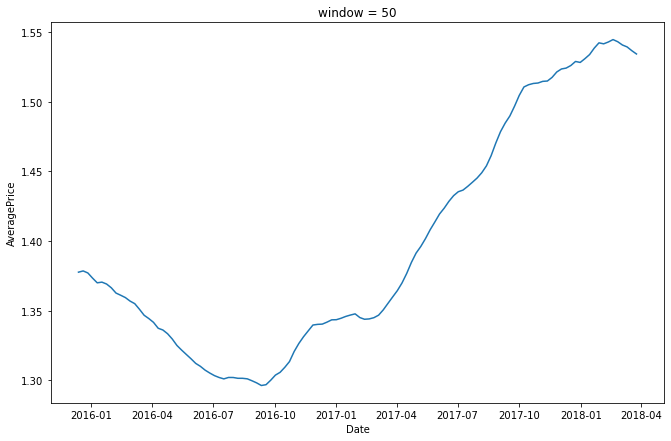

In [247]:
draw_rolling_graph(avocado_mean, 'Date', 'AveragePrice', 50)

### Задание 3
​​​​Изучите параметры функций:
- axis
- center
- closed
- min_periods
- on
- win_type
- window

В документации https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html и дайте характеристику каждой из вышеперечисленных.


DataFrame.rolling(

                    window,
                    
                    min_periods = None,
                    
                    center = False,
                    
                    win_type = None,
                    
                    on = None,
                    
                    axis = 0,
                    
                    closed = None,
                    
                    step = None,
                    
                    method = 'single'
                  )

In [276]:
# Исходный датафрейм

avocado_mean

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


#### window
Размер окна. Число наблюдений используемых для подсчета какой-либо статистики

In [278]:
# Высчитывается среднее по 1 значению (то есть ничего не меняется)

avocado_mean.AveragePrice.rolling(1).mean().head()

0    1.301296
1    1.370648
2    1.391111
3    1.397130
4    1.247037
Name: AveragePrice, dtype: float64

In [279]:
# Высчитывается среднее по 3 значениям

avocado_mean.AveragePrice.rolling(3).mean().head()

0         NaN
1         NaN
2    1.354352
3    1.386296
4    1.345093
Name: AveragePrice, dtype: float64

#### min_periods
Минимальное число наблюдений находящихся в окне необходимых для подсчета значения (если меньше - возвращается NA). Значение по умолчанию равно размеру окна.

In [281]:
# min период - 3. То есть пока над текущим значением не будет количество значений равное минимальному
# (включая текущее), будут ставиться None

avocado_mean.AveragePrice.rolling(3, min_periods = None).mean().head()

0         NaN
1         NaN
2    1.354352
3    1.386296
4    1.345093
Name: AveragePrice, dtype: float64

In [282]:
# Убираем минимальный период (то есть для первого значения оно останется без изменений, потому что над ним никаких
# других нет)

avocado_mean.AveragePrice.rolling(3, min_periods = 1).mean().head()

0    1.301296
1    1.335972
2    1.354352
3    1.386296
4    1.345093
Name: AveragePrice, dtype: float64

#### center 
False - текущая строка самая нижняя в окне (по умолчанию)

True - текущая строка центральная в окне

In [285]:
avocado_mean.AveragePrice.rolling(3, center = True).mean().head()

0         NaN
1    1.354352
2    1.386296
3    1.345093
4    1.318210
Name: AveragePrice, dtype: float64

#### win_type
Тип окна. Если None, то все наблюдения имеют равный вес.

#### on
Колонка, на основе которой считать скользящее окно, если не на основе индексов

#### axis

Ось (столбцы или строки)

- 0 или 'index' - строки (по умолчанию)
- 1 или 'columns' - колонки 

#### closed
Сделать интервал закрытым справа, слева, на обеих или ни на одной точке. По умолчанию используется значение "справа". Для фиксированных - "оба".

### Задание 4
Используйте агрегированные данные avocado_mean.csv о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

ewm - функция, аналогичная rolling, но размер окна увеличивается с каждой итерацией на 1

In [303]:
avocado_mean.AveragePrice.ewm(span = 2).mean() 

0      1.301296
1      1.353310
2      1.379480
3      1.391394
4      1.294758
         ...   
164    1.356212
165    1.352194
166    1.340793
167    1.322734
168    1.338812
Name: AveragePrice, Length: 169, dtype: float64

### Задание 5
В полном датафрейме для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики и сделайте выводы.

In [321]:
# Еще раз взлянем на полный датафрейм

avocado_full.head()

,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [366]:
ax_rolling = avocado_full.copy(deep = True) # скопируем датафрейм в новую переменную

# Отберем только те записи, где type = organic и region = Chicago
# Перезапишем в колонку AveragePrice нового датафрейма скользящее среднее

ax_rolling['AveragePrice'] = ax_rolling \
                                        .query('type == "organic" and region == "Chicago"') \
                                        .AveragePrice \
                                        .rolling(4) \
                                        .mean()


# Построение графика

fig = px.line(ax_rolling, x = ax_rolling.index, y = "AveragePrice", title = 'Rolling mean') 
fig.show()

In [367]:
ax_exp_rolling = avocado_full.copy(deep = True) # скопируем датафрейм в новую переменную

# Отберем только те записи, где type = organic и region = Chicago
# Перезапишем в колонку AveragePrice нового датафрейма экспоненциальное скользящее среднее

ax_exp_rolling['AveragePrice'] = ax_exp_rolling \
                                                .query('type == "organic" and region == "Chicago"') \
                                                .AveragePrice \
                                                .ewm(span = 4) \
                                                .mean()


# Построение графика

fig = px.line(ax_exp_rolling, x = ax_exp_rolling.index, y = "AveragePrice", title = 'Exponential rolling mean') 
fig.show()

In [357]:
# Аналитическое нахождение средней цены за авокадо 21 августа 2016 года при подсчете скользящего среднего 

round(ax_rolling.loc['2016-08-21'].AveragePrice.mean(), 3)

2.102

Ряд, полученный с помощью __экспоненциального скользящего среднего__ является более сглаженным. Средняя
цена за авокадо 21 августа 2016 года при подсчете скользящего среднего была равна __2.102__,
что __больше__ (по графику), чем при использовании экспоненциального. 19 февраля 2017 среднее, полученное с помощью ewm(), равнялось
__1.562__, и было __больше__, чем при использовании rolling(), для которого значение было равно __1.532__.

### Задание 6

Далее будем работать с данными по опозданиям в заключении сделок!
В файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Вот сабсэт данных

 		client_idcompany_id	delay		revenue
 	0	2389	4240	-1 days -14:57:48.000000000	705436
 	1	7614	9544	-4 days -02:14:23.000000000	859266
 	2	2052	2427	-0 days -06:08:57.000000000	812416
 	3	9635	8054	-0 days -23:40:19.000000000	162312
 	4	8154	5503	-1 days -13:21:53.000000000	658844

Сначала давайте переведём delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -. Сохраните данные в переменную df, отформатируйте колонку нужным способом (подсказка – уберите -) и переведите её в тип timedelta.

Могут понадобиться:
- pd.to_timedelta()
- pd.Series.str


In [409]:
# Импорт данных

delays = pd.read_csv('/Users/ola/Documents/Karpov/6. Подробнее о визуализации/delays.csv')

In [410]:
# Взглянем на датафрейм

delays

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


In [411]:
# Функция для удаления "-"

def delete_minus(s):
    return s.replace('-', '')

In [412]:
# Форматирование колонки delay

delays['delay'] = delays['delay'].apply(delete_minus)

In [413]:
delays.head()

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48.000000000,705436
1,7614,9544,4 days 02:14:23.000000000,859266
2,2052,2427,0 days 06:08:57.000000000,812416
3,9635,8054,0 days 23:40:19.000000000,162312
4,8154,5503,1 days 13:21:53.000000000,658844


In [414]:
# Посмотрим на исходные типы данных в датафрейме

delays.dtypes

client_id      int64
company_id     int64
delay         object
revenue        int64
dtype: object

In [415]:
# Преобразуем тип данных колонки delay

delays['delay'] = pd.to_timedelta(delays.delay)

In [416]:
# Посмотрим на типы данных после преобразования

delays.dtypes

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

In [ ]:
# ВСЁ ЗАДАНИЕ В ОДНУ СТРОКУ

delays['delay'] = pd.to_timedelta(delays.delay.str.replace('-', ''))

### Задание 7

Время это хорошо, но хотелось бы также разбить его на промежутки. Разбейте время на 3 интервала и поместите соответствующие значения в колонку delay_categorical

Могут понадобится:
pd.cut()

In [420]:
delays['delay_categorical'] = pd.cut(delays.delay, bins = 3)

In [421]:
delays

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


### Задание 8
Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut!

Перезадайте колонку delay_categorical, чтобы значения в ней были


- 'less than 1 day' – время от 0 до 1 дня
- '1-2 days' – от 1 до 2 дней
- '2-3 days' – от 2 до 3 дней
- 'more than 3 days' – больше 3 дней  


Могут понадобится:
- pd.cut()
- pd.to_timedelta()


In [430]:
delays['delay_categorical'] = pd.cut(
                                       delays.delay, 

                                       bins = [pd.to_timedelta('0d'),
                                               pd.to_timedelta('1d'),
                                               pd.to_timedelta('2d'),
                                               pd.to_timedelta('3d'),
                                               pd.to_timedelta('100d')
                                               ], 

                                       labels=['less than 1 day',
                                               '1-2 days',
                                               '2-3 days',
                                               'more than 3 days']
                                      )

In [431]:
delays.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


### Задание 9
Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки

In [440]:
agg_delays = delays \
                    .groupby('delay_categorical', as_index = False) \
                    .agg({'revenue': 'count'})
agg_delays

,delay_categorical,revenue
0,less than 1 day,59
1,1-2 days,51
2,2-3 days,47
3,more than 3 days,107


In [442]:
plt.figsize = 
fig = px.bar(agg_delays, x = 'delay_categorical', y = 'revenue')
fig.show()